# <center> IIIT Vadodara </center>
## <center> Winter 2021-22 </center>
## <center> CS 612, CS 652, CS/IT 308 Machine Learning </center>
## <center> Lab#5 Basic optimization techniques </center>


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from scipy.io import wavfile
from numpy import linalg as la
import matplotlib.image as mpimg
import glob
from numpy import linalg as LA
import scipy.io as sio 


**Problem 1)** Find minima of following functions using gradient descent method with learning rate 0.01 and 0.1 along with different number of iterations. Try choosing a large value of learning rate and test the convergence. Plot the functions, highlight corresponding minima, and show convergence/divergence on the plot.

(a) $L_1(θ) = θ^2$

(b) $L_2(θ) = θ_1^2 + θ_2^2$

(c) $L_3(θ) = (θ - 1)^2$

(d) $L_4(θ) = 2 (θ_1-1)^2 + 2(θ_2-1)^2$


3.106256837041452e-06


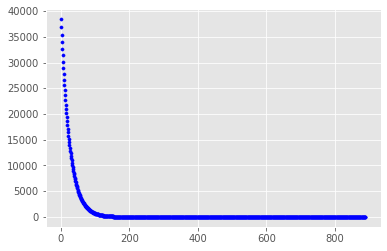

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statistics as st
plt.style.use(['ggplot'])
theta=200
for i in range(890):
    d=2*theta
    if(d>=0):
        theta=theta-0.01*d
        plt.scatter(i,theta**2,s=10,color='blue')
print(theta)


5.522296480647825e-75


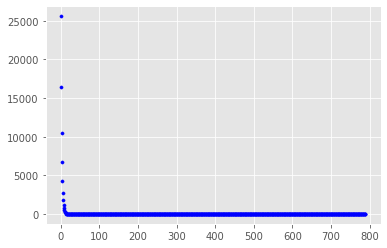

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statistics as st

# you can assume theta=5000000
# p=theta+1
# e=0.000001
# aplha=0.1

# can use while loop for |p-theta|>e
theta=200
for i in range(790):
    d=2*theta
    if(d>=0):
        theta=theta-0.1*d
        plt.scatter(i,theta**2,s=10,color='blue')
print(theta)
   

Q1 (b)


3.106256837041452e-06 4.6593852555621734e-06


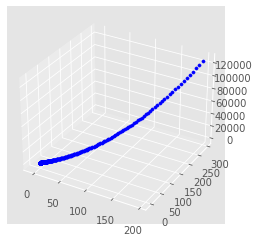

In [9]:
#theta0=10000
#theta1=50000

#e=0.000001
#alpha=0.1

# can use while loop for |theta0-p0|>e or |theta1-p1|>e:
def f(x,y):
    return x**2+y**2
x=np.linspace(-6,6,100)
y=np.linspace(-6,6,100)

X,Y=np.meshgrid(x,y)
Z=f(X,Y)
ax = plt.axes(projection='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

theta1=200
theta2=300
for i in range(890):
    d1=2*theta1
    d2=2*theta2
    if(d1>=0 or d2>=0):
        theta1=theta1-0.01*d1
        theta2=theta2-0.01*d2

        ax.scatter3D(theta1,theta2,theta1**2+theta2**2,s=10,color='blue')
print(theta1,theta2)   
plt.show()

    


In [9]:
theta1=200
theta2=300
for i in range(600):
    d1=2*theta1
    d2=2*theta2
    if(d1>=0 or d2>=0):
        theta1=theta1-0.1*d1
        theta2=theta2-0.1*d2
print(theta1,theta2)  

1.4289669715346075e-56 2.1434504573019106e-56


Q1 (c)

1.0000190420468973


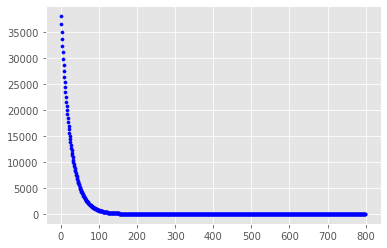

In [10]:
# theta0=50
# p=theta0+1
# e=0.000001
# alpha=0.1

# while for |theta0-p|>e:
theta=200
for i in range(800):
    d=2*theta-2
    if(d>=0):
        theta=theta-0.01*d
        plt.scatter(i,(theta-1)**2,s=10,color='blue')
print(theta)


1.0000000000000004


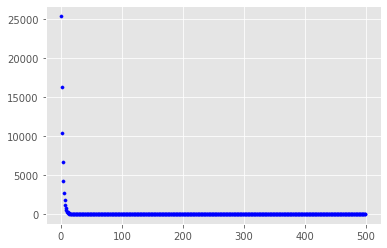

In [11]:
theta=200
for i in range(500):
    d=2*theta-2
    if(d>=0):
        theta=theta-0.1*d
        plt.scatter(i,(theta-1)**2,s=10,color='blue')
print(theta)  

Q1 (d)

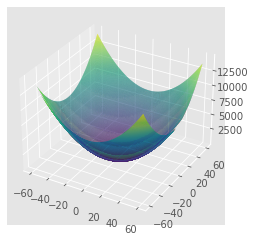

In [13]:
def f(x,y):
    return 2*((x-1)**2)+2*((y-1)**2)
x=np.linspace(-60,60,1000)
y=np.linspace(-60,60,1000)

X,Y=np.meshgrid(x,y)
Z=f(X,Y)
ax = plt.axes(projection='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

1.0000000000000333 1.00000000000005


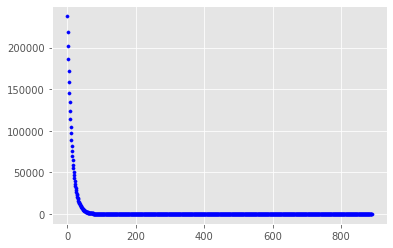

In [15]:
theta1=200
theta2=300
for i in range(890):
    d1=4*theta1-4
    d2=4*theta2-4
    if(d1>=0 or d2>=0):
        theta1=theta1-0.01*d1
        theta2=theta2-0.01*d2
        plt.scatter(i,2*((theta1-1)**2)+2*((theta2-1)**2),s=10,color='blue')
print(theta1,theta2)    


1.0000000000000002 1.0000000000000002


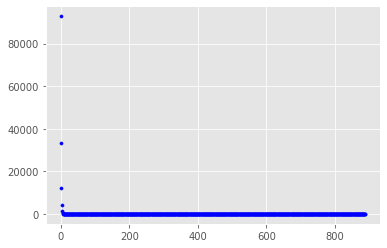

In [16]:
theta1=200
theta2=300
for i in range(890):
    d1=4*theta1-4
    d2=4*theta2-4
    if(d1>=0 or d2>=0):
        theta1=theta1-0.1*d1
        theta2=theta2-0.1*d2
        plt.scatter(i,2*((theta1-1)**2)+2*((theta2-1)**2),s=10,color='blue')
print(theta1,theta2)

**Problem 2)** Consider $A=\begin{bmatrix}
0.7 & 0.2\\
0.1 & 0.6
\end{bmatrix}$ and the observation matrix $b=\begin{bmatrix}
0.5\\
0.6
\end{bmatrix}$ in a system $Ax=b$. However, $b$ is not in column space of $A$, thus $Ax \neq b$ and we need to find $x$ in such a way that $Ax \approx b$. Using linear least square $x$ can be estimated by minimizing the mean squared error as,  $\min ||Ax-b||_2$. 

<br>
This can be written as,
        
$\underset{x}{\mathrm{argmin}}||Ax-b||_{2}^{2} = f(x)$

We need to find $x$ in such a way that $f(x)$ will be minimum in $L_2$ norm. 

<br>

You need to solve this least square problem using gradient descent algortithm on $f(x)$.

<br>
To apply this algorithm we need to find gradient of the function, i.e.,
<br>
              $\Delta_x f(x)= A^T(Ax-b) = A^TAx-A^Tb$

<br>

Optimisation for least-squares
<br>
$||A^TAx-A^Tb||_2>\delta$, $\delta$ is the small positive number indicating tolerance.

<br>

Now we will find new $x$ iteratively using step size $\alpha$ to find the best fit for $AX=b$ as:

<br>
$x^{[n+1]}=x^{[n]}-\alpha (A^TAx-A^Tb)$.
<br>

We need to choose $\alpha$, $\delta$ and $x^{[0]}$ to iterate until $x^{[n+1]} \rightarrow x^{[n]}$.

In [17]:
#Write your code here.
a=np.array([[0.7,0.2],[0.1,0.6]])
b=np.array([[0.5],[0.6]])
x=np.random.rand(2,1)
for i in range(900):
    d=a.T@(a@x-b)
    if(d1>=0.00001):
        x=x-0.1*d1
print(x)




[[0.67564269]
 [0.61358163]]


**Problem 3)** Apply stochastic gradient algorithm on the given dataset and estimate $\theta_0$, $\theta_1$ and final cost value. Step by step hints have been given for the same.



In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
plt.style.use(['ggplot'])

1) Dataset:

In [20]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

2) Visualize the data.

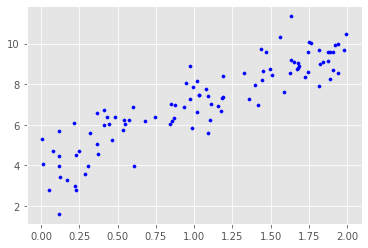

In [21]:
#Write code here
plt.scatter(X,y,s=10,color='blue')
plt.show()



3) We will write the line equation $y=m \space x+c$ in machine learning form as $J(\theta)=\theta_1 X + \theta_0$. Now choose one random sample $X_b$ (you can concatenate ones and $X$) and find $\theta_{best} = (X_b^T X_b)^{-1}X_b^Ty$.

In [22]:
newcol=np.array([np.ones(100)]).T
X = np.concatenate((newcol,X),axis=1)
theta=np.linalg.inv(X.T@X)@X.T@y
print(theta)

[[4.01873892]
 [2.96461861]]


4) For example choose $X_{new}=\begin{bmatrix}
0 \\
2 
\end{bmatrix}$. Obtain $X_{new_b}$ by concatinating ones and $X_{new}$. Finally find $y_{predict}=X_{new_b}\theta_{best}$.

In [23]:
xnew=np.array([[0],[2]])
newcol=np.array([np.ones(2)]).T
xnew = np.concatenate((newcol,xnew),axis=1)
ypre=xnew@theta
print(ypre)

[[4.01873892]
 [9.94797614]]


5) Visualize $X_{new}$ and $y_{predict}$.

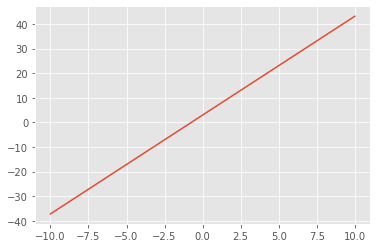

In [25]:
#Write code here.
x=np.linspace(-10,10,100)
y=theta[0,0]*x+theta[1,0]
plt.plot(x,y)
plt.show()


6) Define the cost function.

In [3]:
def  cal_cost(theta,X,y):
    
    m = len(y)
    
    predictions = X@theta
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    
    return cost

7) Define the gradient descent function.

In [4]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
  
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        prediction = np.dot(X,theta)
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
    return theta, cost_history, theta_history

8) Using learning rate $0.01$ and $1000$ iterations find $\theta_0$, $\theta_1$ and final cost.

In [30]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
newcol=np.array([np.ones(100)]).T
X = np.concatenate((newcol,X),axis=1)
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

#X_b = np.c_[np.ones((len(X),1)),X]

theta,cost_history,theta_history = gradient_descent(X,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.688,
Theta1:          3.154
Final cost/MSE:  4391.011


9) Plot $J(\theta)$ and iterations.

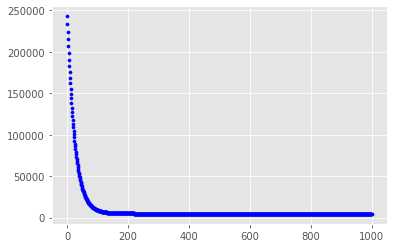

In [32]:
plt.scatter(range(n_iter),cost_history,s=10,c='blue')
plt.show()

10) You can also observe the changes in cost function.

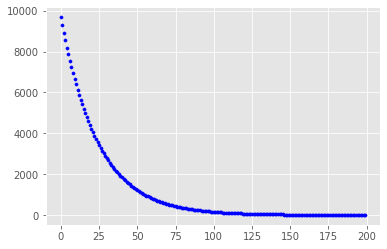

In [38]:
#Write code here.
for i in range(200):
    plt.scatter(i,cost_history[i]-cost_history[i+1],s=10,c='blue')


**Problem 4)** Find minimum of the function $L(θ)$ = using stochastic gradient descent method (take the data from the excel sheet given). Choose different learning rates and number of iterations.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statistics as st




94 94
[[3504]
 [3693]
 [3436]
 [3433]
 [3449]
 [4341]
 [4354]
 [4312]
 [4425]
 [3850]
 [3563]
 [3609]
 [3761]
 [3086]
 [2372]
 [2833]
 [2774]
 [2587]
 [2130]
 [1835]
 [2672]
 [2430]
 [2375]
 [2234]
 [2648]
 [4615]
 [4376]
 [4382]
 [4732]
 [2464]
 [2220]
 [2572]
 [2255]
 [2202]
 [4215]
 [4190]
 [3962]
 [4215]
 [3233]
 [3353]
 [3012]
 [3085]
 [2035]
 [2164]
 [1937]
 [1795]
 [3651]
 [3574]
 [3645]
 [3193]
 [1825]
 [1990]
 [2155]
 [2565]
 [3150]
 [3940]
 [3270]
 [2930]
 [3820]
 [4380]
 [4055]
 [3870]
 [3755]
 [2605]
 [2640]
 [2395]
 [2575]
 [2525]
 [2735]
 [2865]
 [3035]
 [1980]
 [2025]
 [1970]
 [2125]
 [2125]
 [2160]
 [2205]
 [2245]
 [1965]
 [1965]
 [1995]
 [2945]
 [3015]
 [2585]
 [2835]
 [2665]
 [2370]
 [2950]
 [2790]
 [2130]
 [2295]
 [2625]
 [2720]] [[18. ]
 [15. ]
 [18. ]
 [16. ]
 [17. ]
 [15. ]
 [14. ]
 [14. ]
 [14. ]
 [15. ]
 [15. ]
 [14. ]
 [15. ]
 [14. ]
 [24. ]
 [22. ]
 [18. ]
 [21. ]
 [27. ]
 [26. ]
 [25. ]
 [24. ]
 [25. ]
 [26. ]
 [21. ]
 [10. ]
 [10. ]
 [11. ]
 [ 9. ]
 [28. ]
 

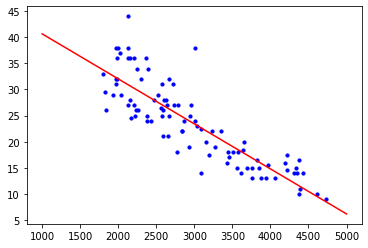

In [15]:
import pandas as pd
import random
df=pd.read_csv('data.csv')
#Read the excel sheet given

X_n = np.array(df['x']).reshape(-1,1)
y_n = np.array(df['y']).reshape(-1,1)


#theta1 = 1000
#theta2 = 500


#eps = 1e-6
#alpha = 0.01
#cnt = 0

#while(|prev1-theta1| >= eps or |prev2-theta2| >= eps):
print(len(X_n),len(y_n))
print(X_n,y_n)
plt.scatter(X_n,y_n,s=10,c='blue')   
newcol=np.array([np.ones(len(X_n))]).T
X_n = np.concatenate((newcol,X_n),axis=1)
print(X_n)
theta=np.linalg.inv(X_n.T@X_n)@X_n.T@y_n
print(theta)
x=np.linspace(1000,5000,100)
y=theta[1,0]*x+theta[0,0]
plt.plot(x,y,c="red")
plt.show()




    
    
#print(theta1,theta2)
#print(cnt)

In [14]:
pip install pandas


     |████████████████████████████████| 10.4 MB 2.4 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
